<h1 align = 'center'>Stock Price Predicition</h1>

## IMPORTING DATA

In [31]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
quandl.ApiConfig.api_key = "sxviPdquBNHrow6THPAu"# Getting Data from Quandl
df = quandl.get("EOD/AAPL")# Putting the Apple stock price data set quandl key
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


## DATA ANALYSIS

In [3]:
df.isna().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [4]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


### How many features(columns) are ther in the dataset

In [6]:
12

12

In [7]:
# Calculating High Low percentage change and close open percent change
df['HL_PCT']= (df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660


In [8]:
df=df[['Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume','HL_PCT','PCT_change']]
df

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,
2013-09-03,15.619650,15.857223,15.437510,15.476472,331928800.0,2.711941,-0.916650
2013-09-04,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953
2013-09-05,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
2013-09-06,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-09,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
...,...,...,...,...,...,...,...
2017-12-21,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287
2017-12-22,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
2017-12-26,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660


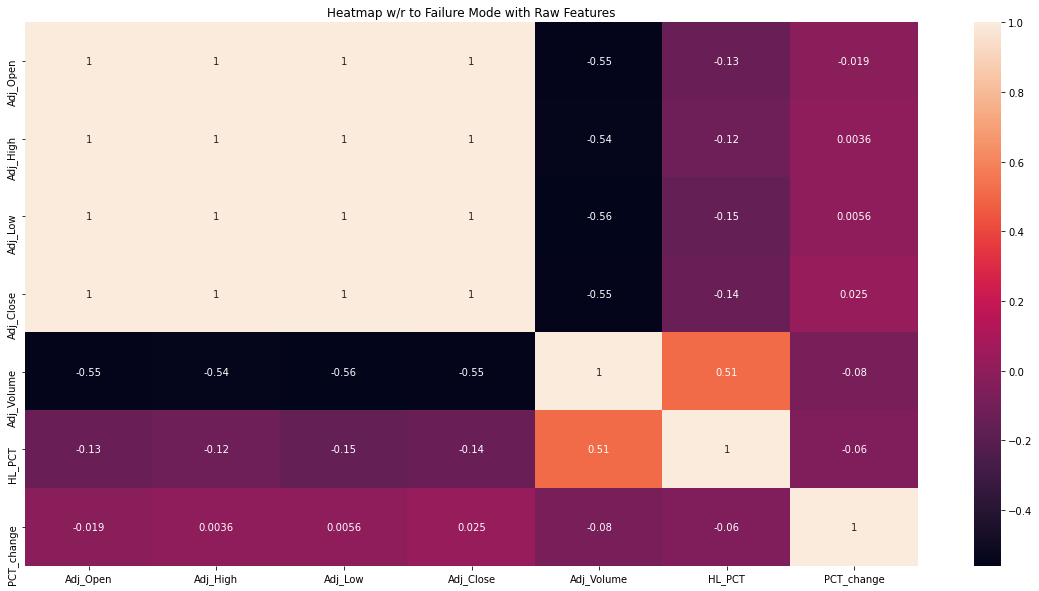

In [9]:
plt.subplots(figsize=(20,10))
_=plt.title('Heatmap w/r to Failure Mode with Raw Features')
corr = df.corr() 
sns.heatmap(corr, annot = True)

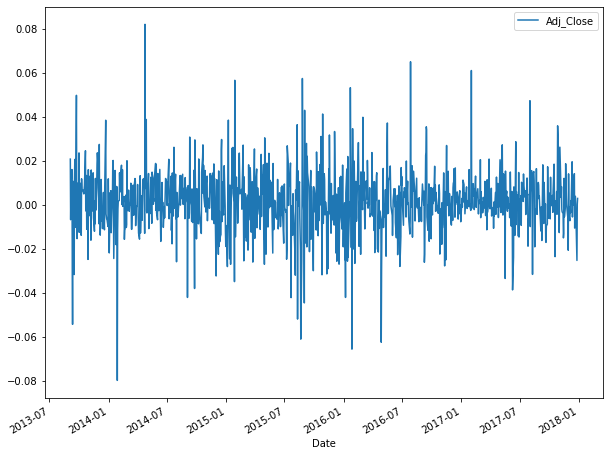

In [10]:
df[['Adj_Close']].pct_change().plot(figsize=(10,8))

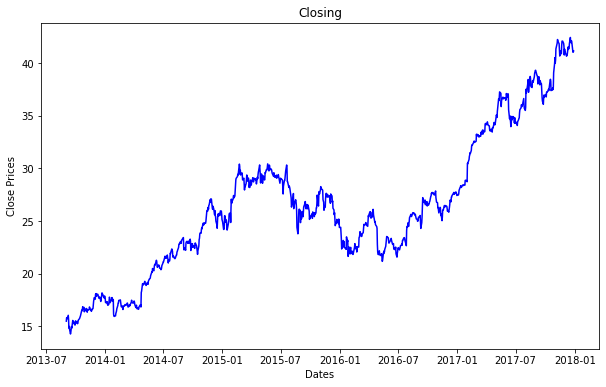

In [11]:
plt.figure(figsize=(10,6))
plt.plot (df['Adj_Close'],'b')
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.title('Closing') 
plt.show()

In [12]:
df.corr()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Open,1.000000,0.999528,0.999416,0.998987,-0.549990,-0.133494,-0.018729
Adj_High,0.999528,1.000000,0.999278,0.999526,-0.544404,-0.117588,0.003561
Adj_Low,0.999416,0.999278,1.000000,0.999558,-0.560073,-0.154542,0.005597
Adj_Close,0.998987,0.999526,0.999558,1.000000,-0.553474,-0.137288,0.025237
Adj_Volume,-0.549990,-0.544404,-0.560073,-0.553474,1.000000,0.512480,-0.079556
HL_PCT,-0.133494,-0.117588,-0.154542,-0.137288,0.512480,1.000000,-0.060349
PCT_change,-0.018729,0.003561,0.005597,0.025237,-0.079556,-0.060349,1.000000


## Preparing Input output features for training and testing the model

In [22]:
print('Shape of df:',df.shape)
label = df['Adj_Close'].shift(-10) # Creating a new column label with the last 10 rows as NaN
print("Labels having rows as Nan:", label.isna().sum())
print("Label shape ",label.shape, "with Nan")
label.dropna(inplace=True)
y=np.array(label)
print("Shape of y:", y.shape)

Shape of df: (1090, 7)
Labels having rows as Nan: 10
Label shape  (1090,) with Nan
Shape of y: (1080,)


In [26]:
X = (df[['Adj_Open','Adj_High','Adj_Low','Adj_Volume','HL_PCT','PCT_change']]) #Creating a feature array
print("Shape of x dataset:",x.shape)
X_lately = X[-10:]
X = X[:-10]
print("Shape of X after removing x_lately:",X.shape)
print("Shape of x latey:",X_lately.shape)
#Splitting the data in train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=41)
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)
X_lately = norm.transform(X_lately)

Shape of x dataset: (1080, 6)
Shape of X after removing x_lately: (1080, 6)
Shape of x latey: (10, 6)


In [28]:
reg =LinearRegression()
reg.fit(X_train,y_train)
score=reg.score(X_test,y_test)
print("Estimated Intercept Coeff:", reg.intercept_)
print('Number of Coeff:', len(reg.coef_))

Estimated Intercept Coeff: 13.812318621705254
Number of Coeff: 6


In [35]:
forecast=[]
forecast= reg.predict(X_lately)
y_pred=reg.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse)
print("Linear Regression Score:", score)
print(forecast)

MSE: 1.5308587092562382
Linear Regression Score: 0.9653127548266189
[41.68251479 41.85163168 42.64091008 42.20790736 42.04507469 42.40381488
 42.39216508 41.18122178 41.23830539 41.43016012]
